In [1]:
#############################################################################
### Търсене и извличане на информация. Приложение на дълбоко машинно обучение
### Стоян Михов
### Зимен семестър 2021/2022
#############################################################################
###
### Домашно задание 2  -- програма за извикване на обучението
###
#############################################################################

import nltk
from nltk.corpus import PlaintextCorpusReader
import numpy as np
import sys

import grads
import utils
import w2v_sgd
import sampling

In [ ]:
#############################################################
#######   Зареждане на корпуса
#############################################################
startToken = '<START>'
endToken = '<END>'

corpus_root = '../../practice/JOURNALISM.BG/C-MassMedia'
myCorpus = PlaintextCorpusReader(corpus_root, '.*\.txt')

corpus = [ [startToken] + [w.lower() for w in sent] + [endToken] for sent in myCorpus.sents()]

windowSize = 3
negativesCount = 5
embDim = 50

words, word2ind, freqs = utils.extractDictionary(corpus, limit=20000)
data = utils.extractWordContextPairs(corpus, windowSize, word2ind)

del corpus

In [ ]:
U0 = (np.random.rand(len(words), embDim) - 0.5) / embDim
V0 = (np.random.rand(len(words), embDim) - 0.5) / embDim
v0 = (np.random.rand(embDim) - 0.5) / embDim

seq = sampling.createSamplingSequence(freqs)
contextFunction = lambda c: sampling.sampleContext(c, seq, negativesCount)

if len(sys.argv)>1 and sys.argv[1] == 'cumulative':
    U,V,v = w2v_sgd.stochasticGradientDescend(data,np.copy(U0),np.copy(V0),np.copy(v0),contextFunction,grads.lossAndGradientCumulative)
else:
    U,V,v = w2v_sgd.stochasticGradientDescend(data,np.copy(U0),np.copy(V0),np.copy(v0),contextFunction,grads.lossAndGradientBatched)

In [6]:
np.save('w2v-U',U)
np.save('w2v-V',V)
np.save('w2v-vv',v)

Running Truncated SVD over 20000 words...
Done.


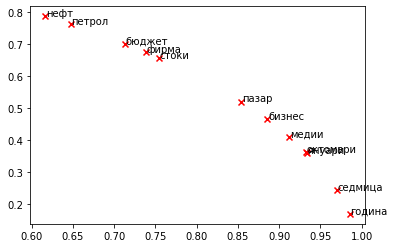

In [8]:
#U = np.load('w2v-U')
#V = np.load('w2v-V')

E = np.concatenate([U,V],axis=1)

E_reduced =utils.SVD_k_dim(E,k=2)
E_normalized_2d = E_reduced /np.linalg.norm(E_reduced, axis=1)[:, np.newaxis]

sampleWords = 'януари октомври седмица година медии пазар стоки бизнес фирма бюджет петрол нефт'.split()

utils.plot_embeddings(E_normalized_2d, word2ind, sampleWords, 'embeddings')